In [ ]:
# !pip install missingno

In [1]:
import pandas as pd
import pickle
import missingno as msno
import matplotlib.pyplot as plt 

In [2]:
from scipy import stats

In [138]:
RS = 42

# Final work

<b> Что нужно сделать </b> 

1. Проведите подготовительную работу (один час):
* Прочитайте предоставленный датасет.
* Ознакомьтесь с описаниями представленных атрибутов.
* Оцените полноту и чистоту данных. Попытайтесь понять, что стоит за этими данными в реальном мире. Приведите данные в удобный/нормальный вид для дальнейшей работы. 

2. Проведите разведочный анализ данных (четыре часа):
* Проведите базовую чистку: дубликаты, пустые значения, типизация данных, ненужные атрибуты.
* Посмотрите на распределение ключевых атрибутов, их отношения.

3. Выполните задание согласно вашей специализации (18 часов):
* Научитесь предсказывать совершение целевого действия (ориентировочное значение ROC-AUC ~ 0.65) — факт совершения пользователем целевого действия.
* Упакуйте получившуюся модель в сервис, который будет брать на вход все атрибуты, типа utm_*, device_*, geo_*, и отдавать на выход 0/1 (1 — если пользователь совершит любое целевое действие).

# EDA

## Load data and view

In [3]:
# Загрузка данных по сессиям
with open('data/ga_sessions.pkl', 'rb') as file:
    sessions = pickle.load(file)

In [4]:
sessions

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,None,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [5]:
sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')

<Axes: >

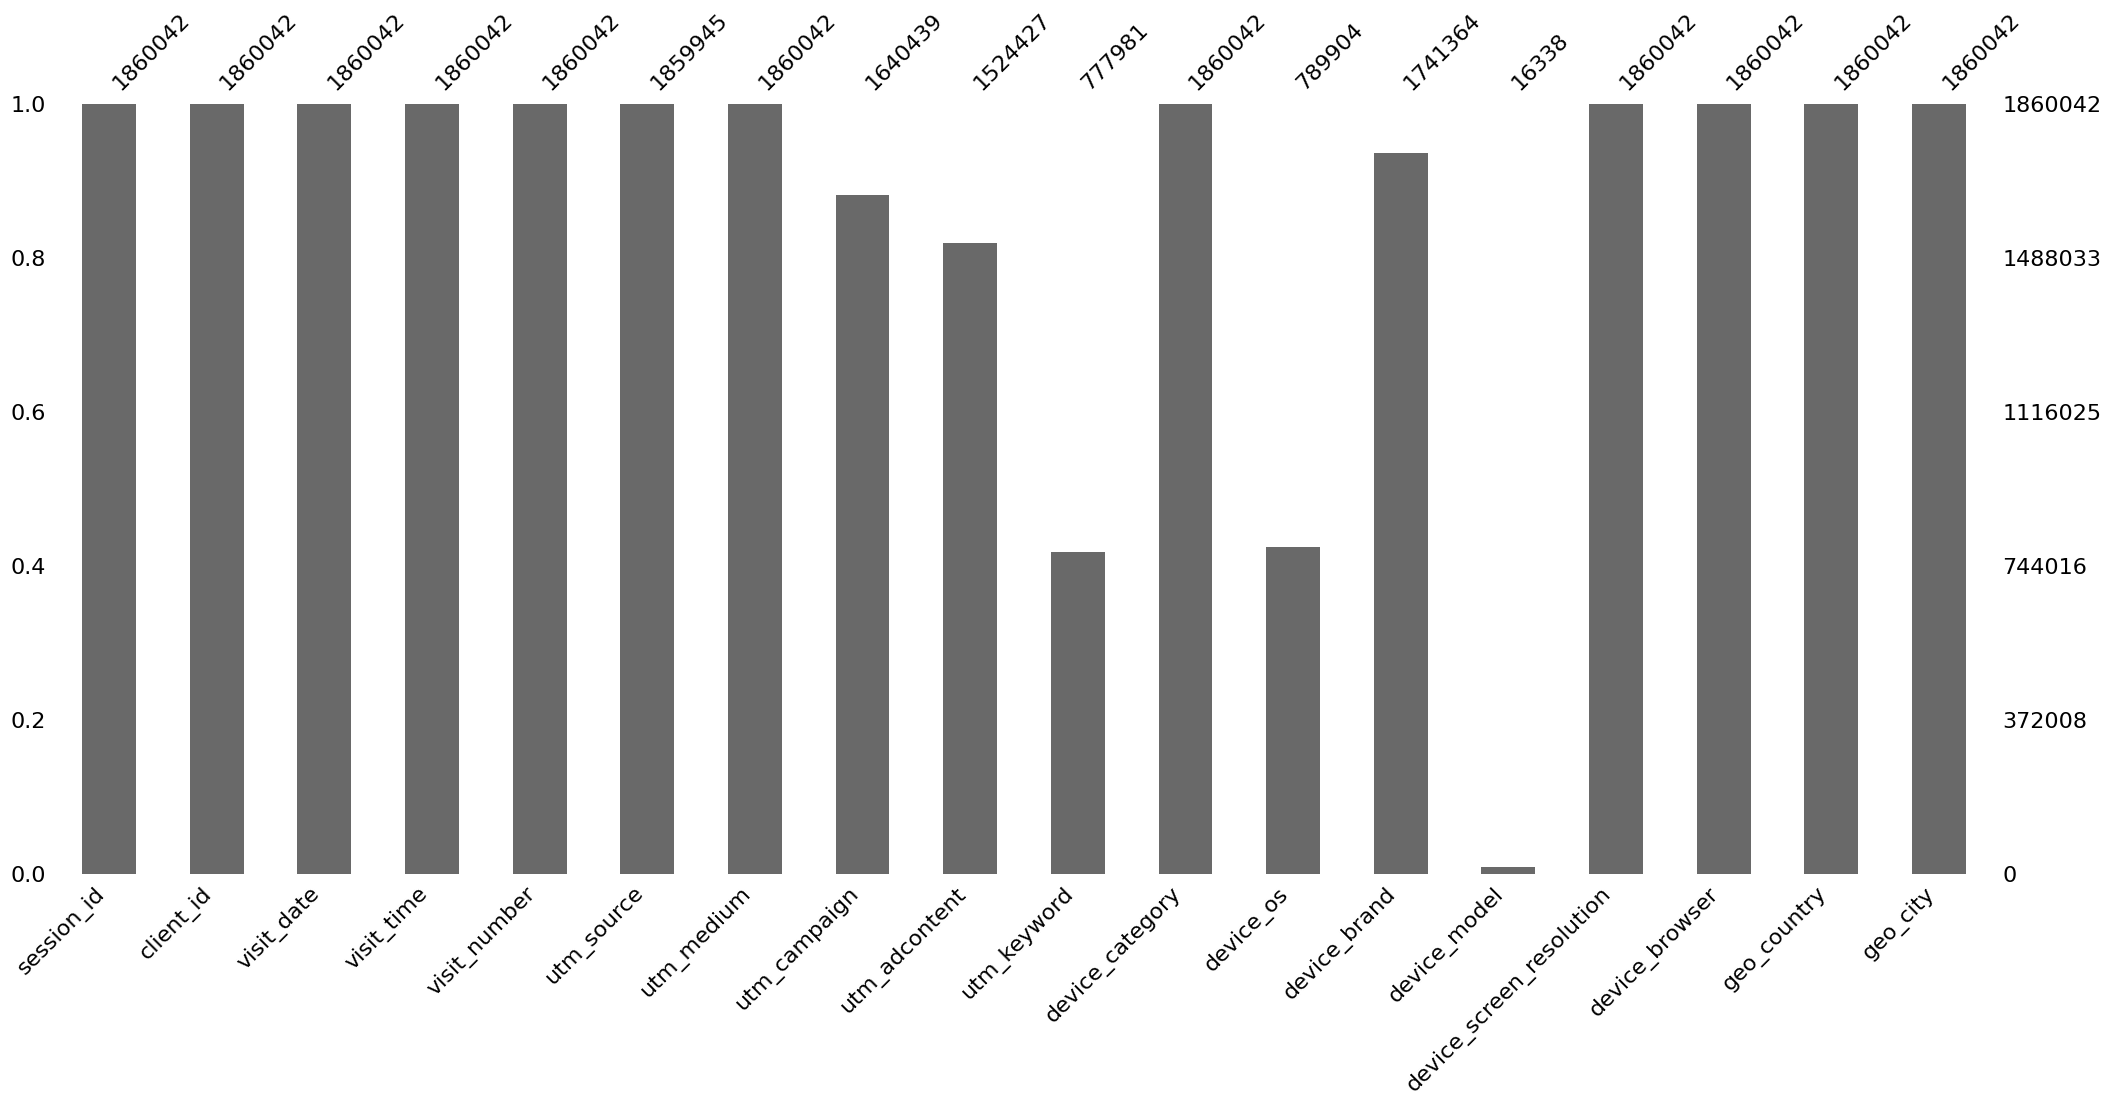

In [6]:
msno.bar(sessions)

In [7]:
sessions.duplicated().sum()

0

In [8]:
# Загрузка данных по действиям
with open('data/ga_hits.pkl', 'rb') as file:
    ga_hits = pickle.load(file)

In [9]:
ga_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,None
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,None
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,None
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,None


In [10]:
ga_hits.columns

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')

<Axes: >

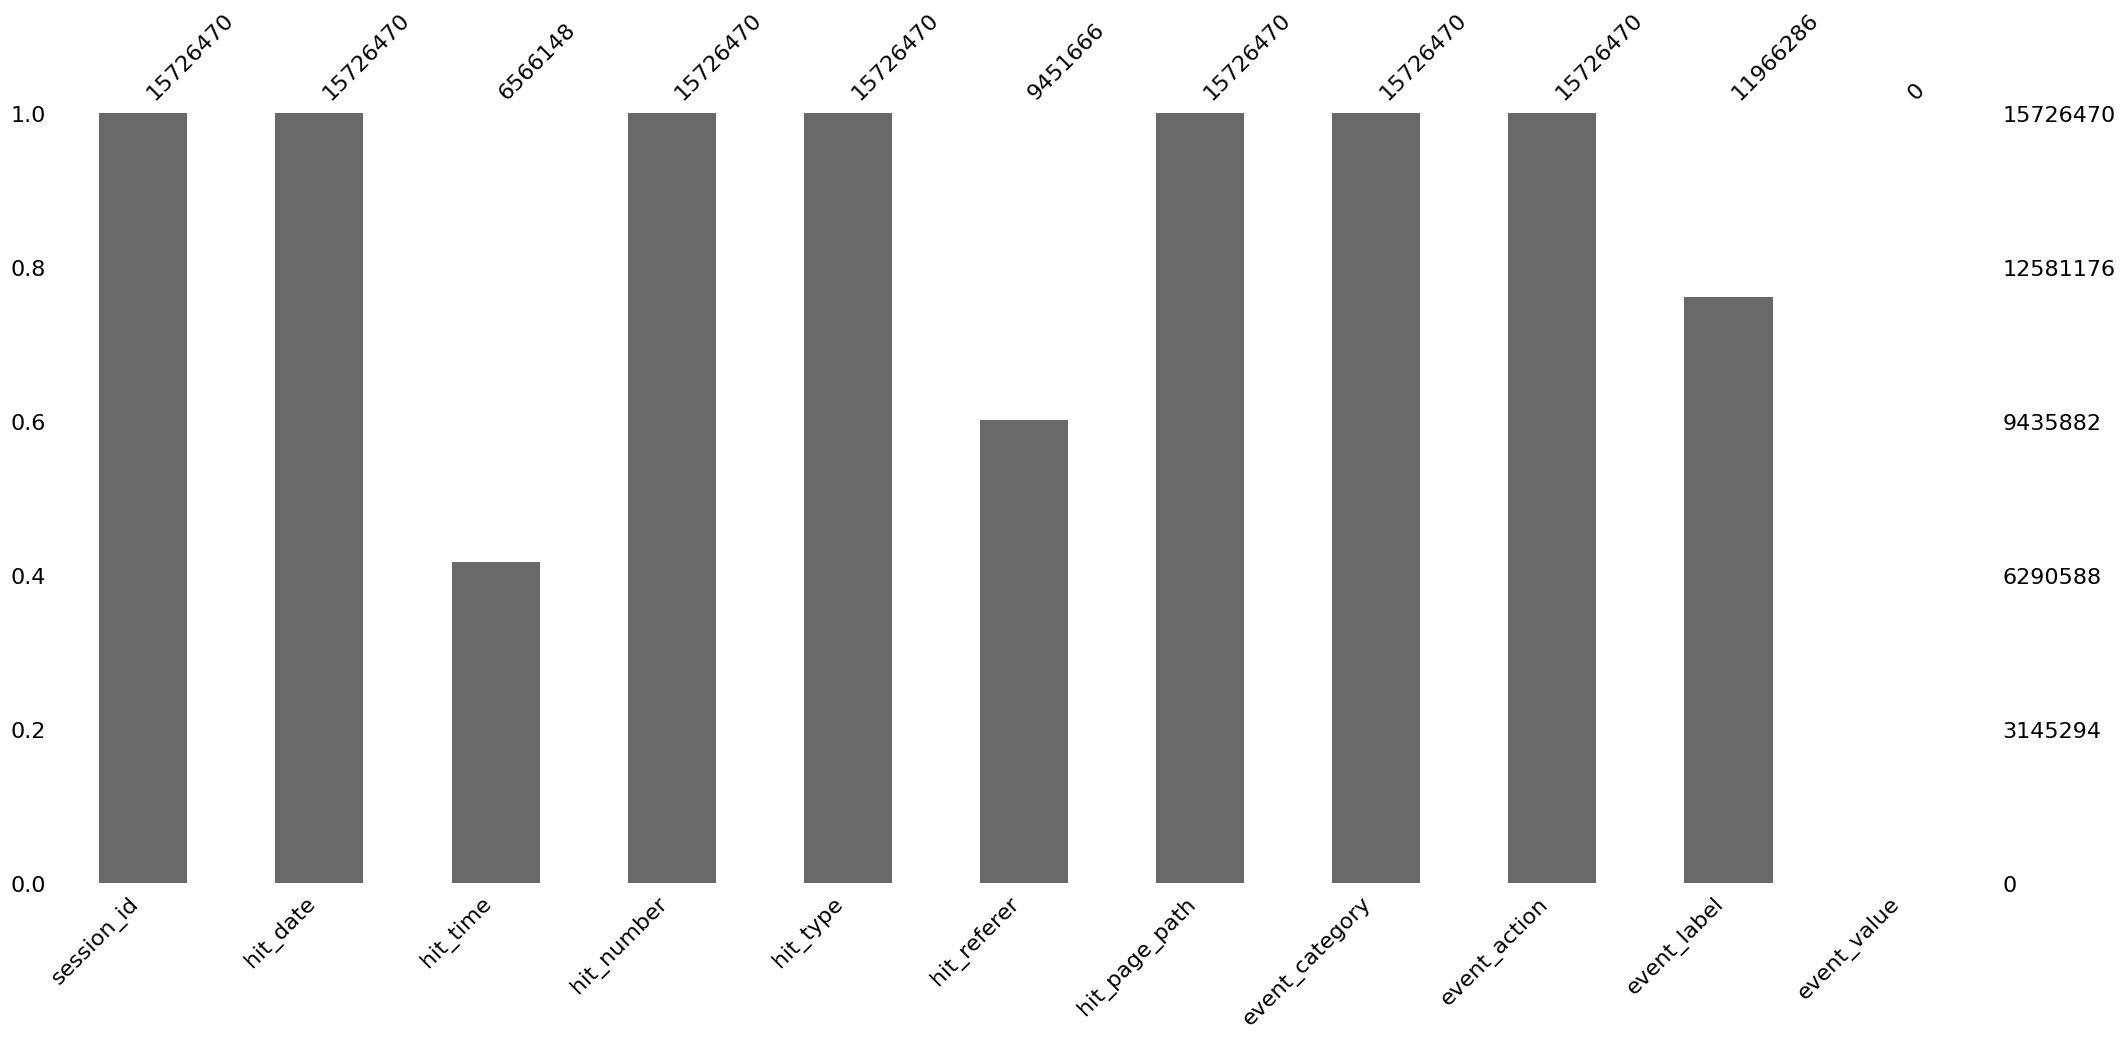

In [11]:
msno.bar(ga_hits)

In [12]:
ga_hits.duplicated().sum()

0

Согласно условию задания сервис должен принимать "на вход все атрибуты, типа utm_*, device_*, geo_* ". Поэтому из таблицы ga_hits буду использовать только значения целевой переменной. Хотя возможно и можно использовать другие параметры для улучшения предсказательной способности модели.

Целевое действие — события типа «Оставить заявку» и «Заказать звонок»
(ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']).

In [13]:
cr_list = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 
 'sub_submit_success', 'sub_car_request_submit_click']

In [14]:
ga_hits['conversion'] = ga_hits.event_action.apply(lambda x: x in cr_list)

In [15]:
ga_hits['conversion'].value_counts()

conversion
False    15621562
True       104908
Name: count, dtype: int64

In [16]:
ga_hits['conversion'].sum()/ga_hits['conversion'].shape[0]

0.006670791347327149

In [17]:
%%time
data = ga_hits.groupby(['session_id']).agg({'conversion': 'max'})
data

CPU times: total: 9.22 s
Wall time: 13.5 s


,conversion
session_id,
1000009318903347362.1632663668.1632663668,False
1000010177899156286.1635013443.1635013443,False
1000013386240115915.1635402956.1635402956,False
1000017303238376207.1623489300.1623489300,False
1000020580299877109.1624943350.1624943350,False
...,...
999960188766601545.1626816843.1626816843,False
99996598443387715.1626811203.1626811203,False
999966717128502952.1638428330.1638428330,False


In [18]:
sessions = sessions.merge(data, on='session_id', how='inner')

<Axes: >

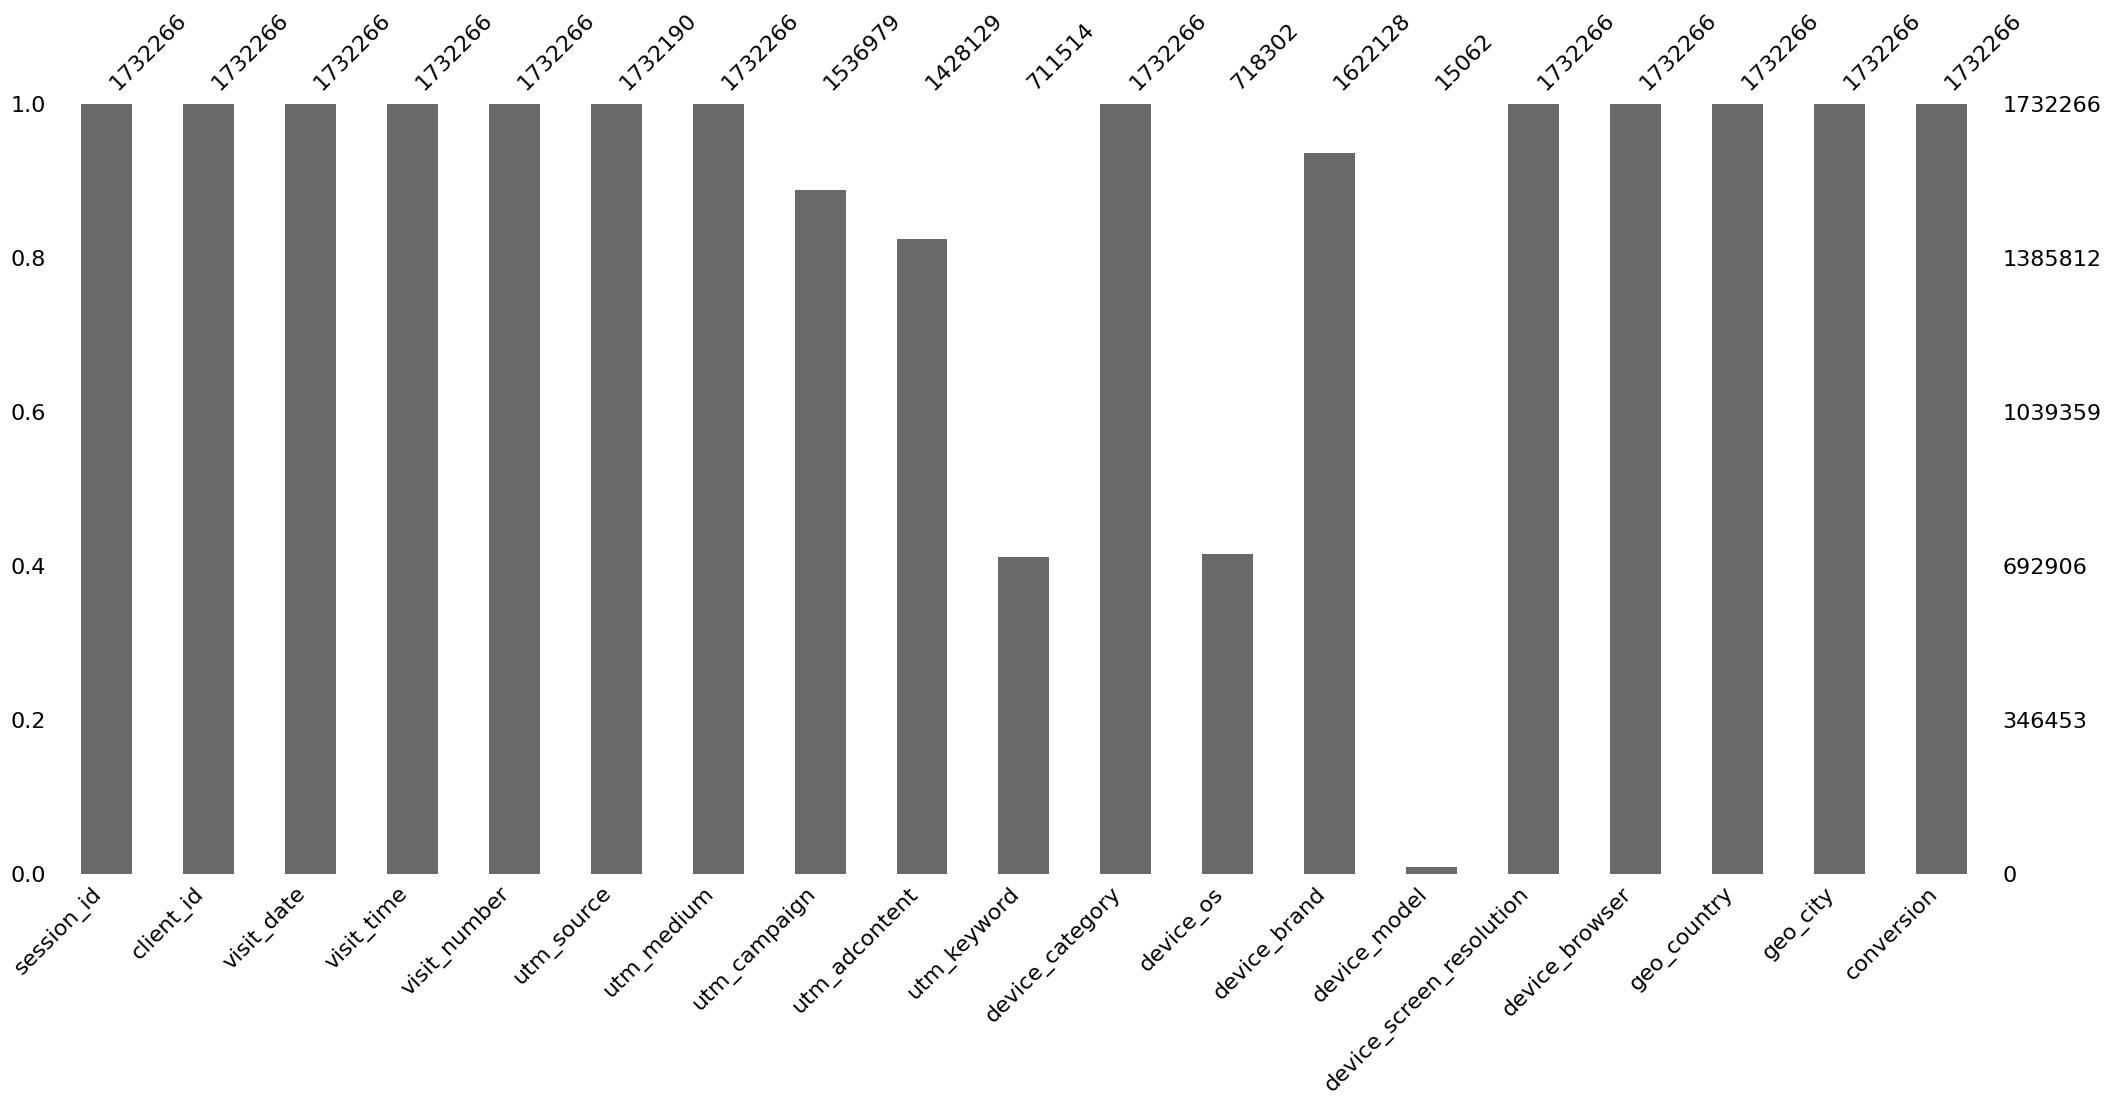

In [19]:
msno.bar(sessions)

In [20]:
sessions.conversion.value_counts()

conversion
False    1681952
True       50314
Name: count, dtype: int64

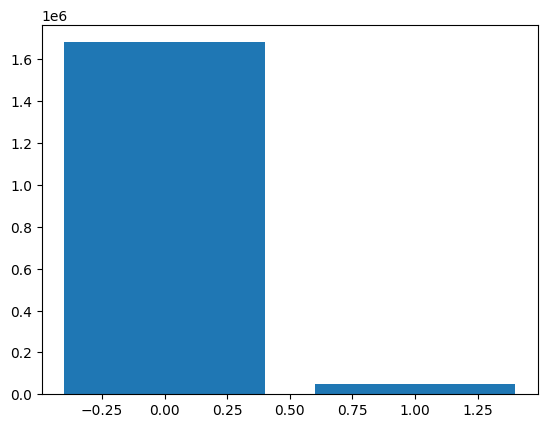

In [24]:
plt.bar([0, 1], sessions.conversion.value_counts())
plt.show()

## Дополнительный анализ

In [20]:
sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'conversion'],
      dtype='object')

In [23]:
data = sessions.groupby(['client_id', 'visit_number', 'device_category'], as_index=False).agg({'conversion': 'max'})

In [26]:
data[data.conversion==True]

,client_id,visit_number,device_category,conversion
71,1000065455.1633104154,1,mobile,True
140,100015483.1621838736,1,mobile,True
201,1000216627.1636858633,1,mobile,True
215,1000237707.1631203951,1,mobile,True
235,1000254258.1632255099,1,mobile,True
...,...,...,...,...
1728920,999752560.1631004147,1,mobile,True
1728953,999774860.1621955695,1,desktop,True
1728996,999824722.1623758775,1,desktop,True
1729047,999917083.1633253522,1,mobile,True


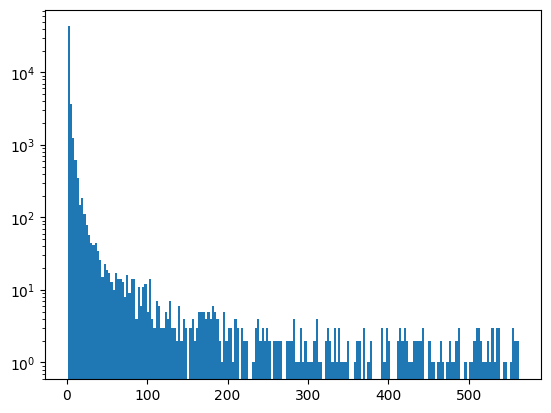

In [31]:
plt.hist(data[data.conversion==True].visit_number, bins=200, log=True)
plt.show()

In [32]:
data.client_id.value_counts()

client_id
1750498477.1629450062    449
1266574870.1623140118    303
736859557.1619557452     301
1894772482.1621860860    270
1065181919.1631610625    256
                        ... 
1832564865.1624933371      1
183256535.1621843618       1
1832568182.1640410061      1
1832569135.1622457058      1
1000000719.1634385152      1
Name: count, Length: 1320704, dtype: int64

In [36]:
data[['client_id', 'conversion']].value_counts()

client_id              conversion
1266574870.1623140118  False         301
736859557.1619557452   False         287
1894772482.1621860860  False         269
1065181919.1631610625  False         254
260799907.1630999549   False         250
                                    ... 
1697276068.1637687418  False           1
1697272957.1633885657  False           1
1697272466.1639018113  False           1
1697272008.1625203966  False           1
1966354032.1636317685  False           1
Name: count, Length: 1339718, dtype: int64

In [37]:
data[data.client_id=='1750498477.1629450062']

,client_id,visit_number,device_category,conversion
672510,1750498477.1629450062,1,desktop,True
672511,1750498477.1629450062,7,desktop,False
672512,1750498477.1629450062,8,desktop,False
672513,1750498477.1629450062,9,desktop,False
672514,1750498477.1629450062,10,desktop,False
...,...,...,...,...
672954,1750498477.1629450062,559,desktop,True
672955,1750498477.1629450062,561,desktop,True
672956,1750498477.1629450062,562,desktop,True
672957,1750498477.1629450062,563,desktop,False


In [38]:
sessions[sessions.client_id=='1750498477.1629450062']

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,conversion
1411106,7518333712042258254.1629450062.1629450062,1750498477.1629450062,2021-08-20,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,None,,NaN,1792x1120,Chrome,Russia,Moscow,True
1411107,7518333712042258254.1629816868.1629816868,1750498477.1629450062,2021-08-24,17:00:00,7,kjsLglQLzykiRbcDiGcD,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,None,,NaN,1920x1080,Chrome,Russia,Moscow,False
1411108,7518333712042258254.1629884885.1629884885,1750498477.1629450062,2021-08-25,12:00:00,8,kjsLglQLzykiRbcDiGcD,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,None,,NaN,1792x1120,Chrome,Russia,Moscow,False
1411109,7518333712042258254.1629891199.1629891199,1750498477.1629450062,2021-08-25,14:00:00,9,kjsLglQLzykiRbcDiGcD,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,None,,NaN,1920x1080,Chrome,Russia,Moscow,False
1411110,7518333712042258254.1629891203.1629891203,1750498477.1629450062,2021-08-25,14:00:00,10,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,desktop,None,,NaN,1920x1080,Chrome,Russia,Moscow,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411550,7518333712042258254.1640250075.1640250075,1750498477.1629450062,2021-12-23,12:01:15,559,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,UKNBOHebRIIsQRsjNKay,desktop,Macintosh,None,NaN,1792x1120,Chrome,Russia,Moscow,True
1411551,7518333712042258254.1640258901.1640258901,1750498477.1629450062,2021-12-23,14:28:21,561,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,hAmNSZmQkKQKAjZEGlgb,desktop,Macintosh,None,NaN,1792x1120,Chrome,Russia,Moscow,True
1411552,7518333712042258254.1640262365.1640262365,1750498477.1629450062,2021-12-23,15:26:05,562,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,hAmNSZmQkKQKAjZEGlgb,desktop,Macintosh,None,NaN,1792x1120,Chrome,Russia,Moscow,True
1411553,7518333712042258254.1640271352.1640271352,1750498477.1629450062,2021-12-23,17:55:52,563,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,hAmNSZmQkKQKAjZEGlgb,desktop,Macintosh,None,NaN,1792x1120,Chrome,Russia,Moscow,False


### Анализ пустых значений

In [25]:
sessions.device_category.value_counts()

device_category
mobile     1368679
desktop     346891
tablet       16696
Name: count, dtype: int64

In [26]:
# Самая пустая колонка
sessions.device_model.value_counts()

device_model
AuMdmADEIoPXiWpTsBEj    9018
tWBQlsvNfHxRUjaPAfhd     596
cwMJxNXiWUgMUxGiCTPs     586
pTgAEPipQxDXCjPrJbHo     430
FJApgTrMAGHoxCxQVKws     347
                        ... 
VDidzTqFGxuqiRQJGrwB       1
hOhIHYHnDhUlkzDoZJdA       1
zcovoWIWBZLooJXEJyTD       1
aWSBcBZlKorTFjJGlWKG       1
qmRODeCJLlmkmwxNYXvp       1
Name: count, Length: 104, dtype: int64

In [27]:
sessions[sessions.device_model.isna()]['conversion'].sum()

49972

In [28]:
sessions[sessions.device_model.notna()]['conversion'].sum()

342

In [29]:
sessions[sessions.device_model.notna()]['conversion'].sum()/sessions[sessions.device_model.isna()]['conversion'].sum()

0.006843832546225887

In [30]:
sessions[sessions.device_model.notna()]['conversion'].sum()/sessions.device_model.notna().sum()

0.022706147921922718

In [31]:
sessions[sessions.device_model.isna()]['conversion'].sum()/sessions.device_model.isna().sum()

0.029100794081541856

Отношение конверсии не сильно зависит от наличия или отсутствия поля device_model, поэтому буду удалять это поле.

In [32]:
columns_to_drop = ['device_model']

In [33]:
sessions = sessions.drop(columns=columns_to_drop)

In [34]:
sessions.device_os.value_counts()

device_os
Android          425520
iOS              182597
Windows           81740
Macintosh         23415
Linux              4616
(not set)           309
Chrome OS            65
BlackBerry           24
Tizen                 7
Firefox OS            3
Nokia                 2
Samsung               2
Windows Phone         2
Name: count, dtype: int64

In [35]:
# Заполним пустые значения значением other
columns_to_fill_other = ['device_os']

In [36]:
sessions[columns_to_fill_other[0]] = sessions[columns_to_fill_other[0]].fillna('other')

In [37]:
sessions.device_brand.value_counts()

device_brand
Apple       503533
Samsung     311641
Xiaomi      269251
            237058
Huawei      173828
             ...  
Tesla            1
Vodafone         1
Wexler           1
Smarteo          1
Maxvi            1
Name: count, Length: 201, dtype: int64

In [38]:
sessions[sessions.device_brand.isna()].conversion.sum()

2495

In [39]:
sessions[sessions.device_brand.notna()].conversion.sum()

47819

In [40]:
sessions.device_brand.isna().sum()

110138

In [41]:
sessions[sessions.device_brand.isna()].conversion.sum()/sessions.device_brand.isna().sum()

0.022653398463745485

In [42]:
sessions[sessions.device_brand.notna()].conversion.sum()/sessions.device_brand.notna().sum()

0.029479177968692975

In [43]:
sessions[sessions.device_brand.isna()].conversion.sum()/sessions[sessions.device_brand.notna()].conversion.sum()

0.05217591333988582

Отношение конверсии по незаполненным значениям поля device_brand значительно отличается от всего датасета. Пустые значения нужно заполнять. Заполним значением other.

In [44]:
sessions['device_brand'] = sessions.device_brand.fillna('other')

In [48]:
on_conv_set = set(sessions[sessions.conversion].device_brand.to_list())

In [49]:
sessions['device_brand'] = sessions['device_brand'].apply(lambda x: x if x in on_conv_set else 'out')

In [50]:
sessions.device_brand.value_counts()

device_brand
Apple         503533
Samsung       311641
Xiaomi        269251
              237058
Huawei        173828
               ...  
Condor             7
Razer              6
Land Rover         3
Vertu              3
Motive             1
Name: count, Length: 69, dtype: int64

Пока просто заполним поле device_brand значением other

In [51]:
columns_to_fill_other.append('device_brand')

sessions[columns_to_fill_other[1]] = sessions[columns_to_fill_other[1]].fillna('other')

<Axes: >

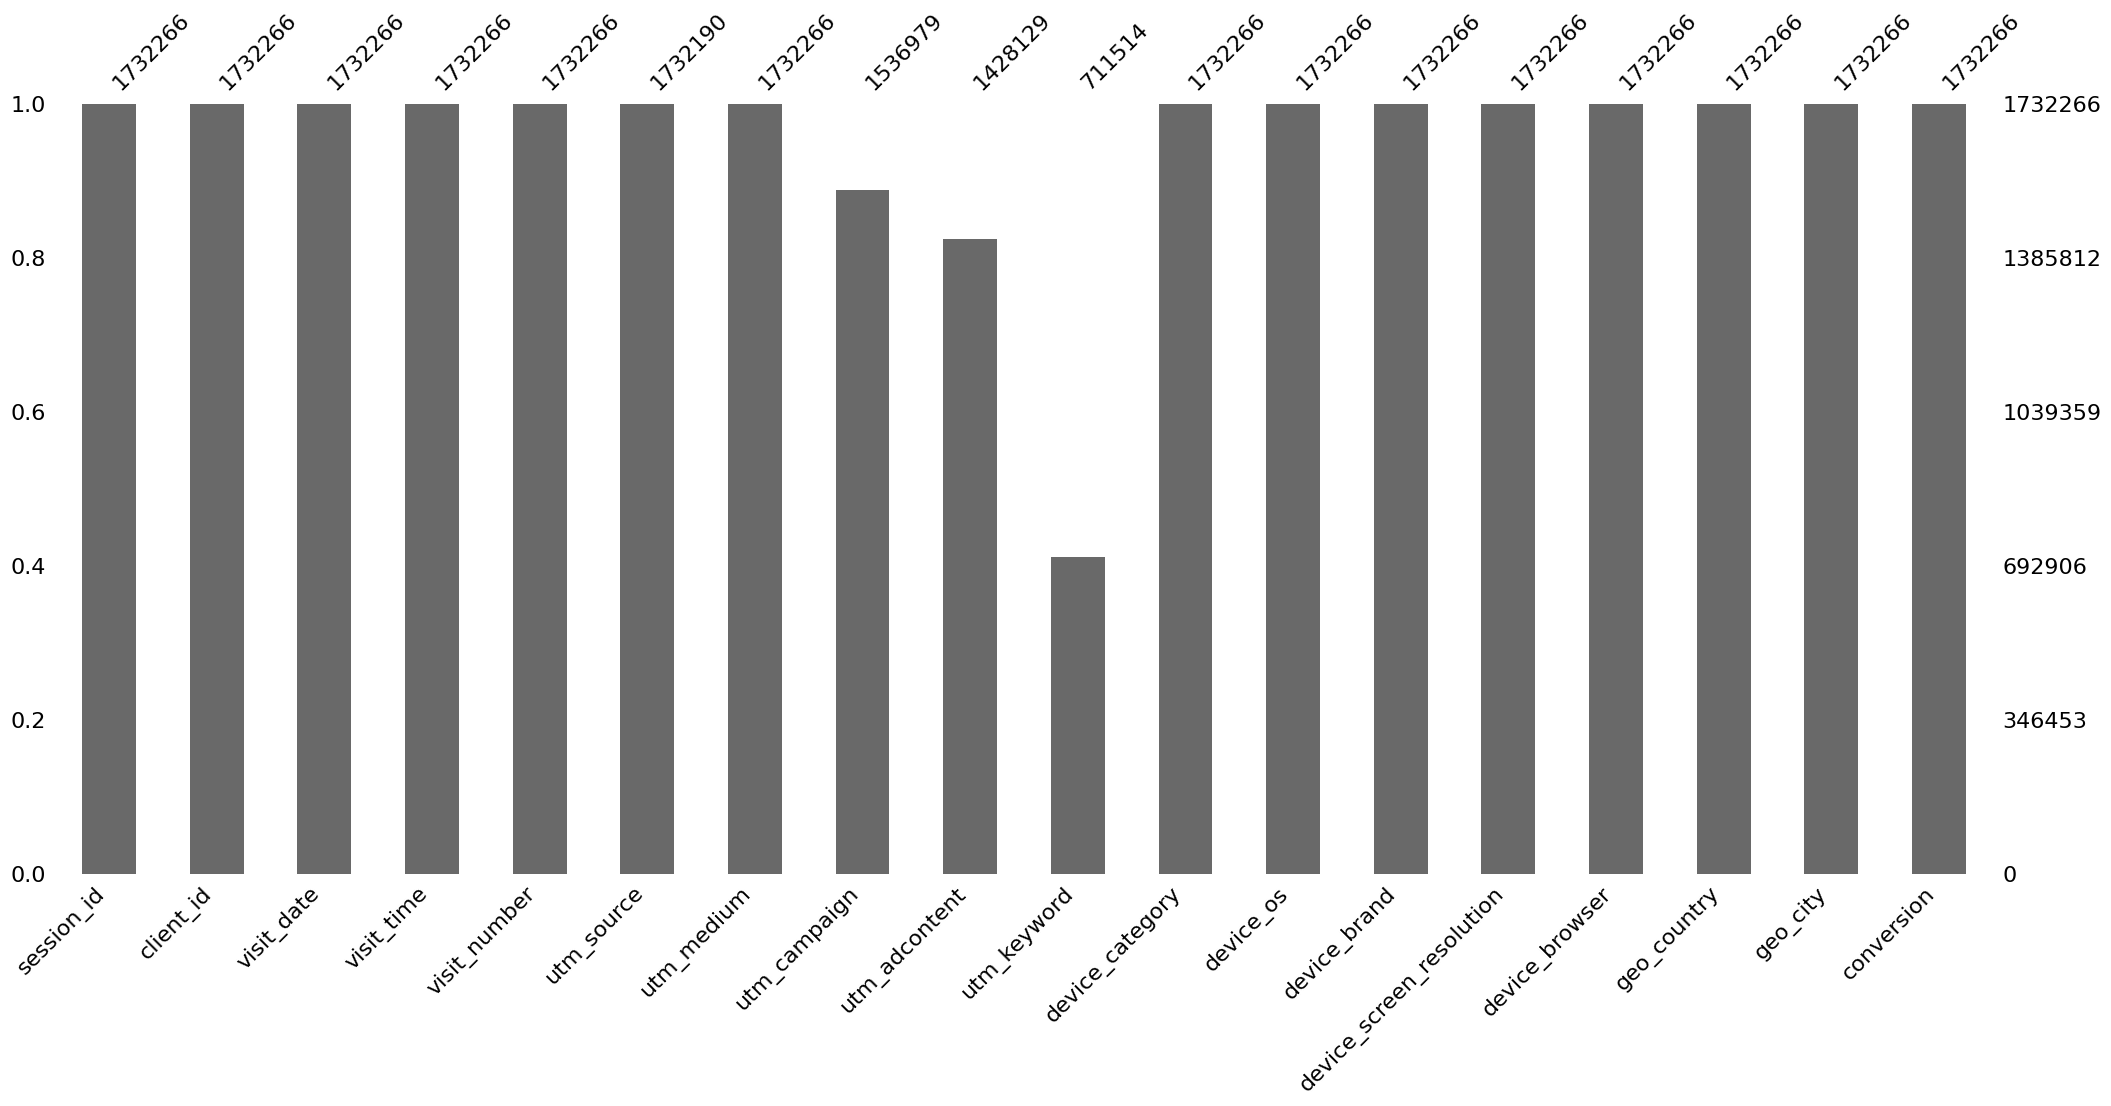

In [52]:
msno.bar(sessions)

In [55]:
sessions.utm_keyword.value_counts(dropna=False)

utm_keyword
NaN                     1020752
puhZPIYqKXeFPaUviSjo     465950
aXQzDWsJuGXeBXexNHjc      18154
ITfrGJNwVsHBGJMAKoct      12395
pHqgLcdBQPSLcrTpLkdr      12320
                         ...   
VBmazutCflYumtDHrQYe          1
jWQZKvbKuDnnQLCqeuOF          1
WFIDyezrAGnnopAqVVDs          1
NLWjXuYiXlKrFJfSWfKt          1
fcXWTQaKfxbkBkBnzLhK          1
Name: count, Length: 1193, dtype: int64

In [54]:
def decrease_unconv(series_name):
    sessions[series_name] = sessions[series_name].fillna('other')
    on_conv_set = set(sessions[sessions.conversion][series_name].to_list())
    sessions[series_name] = sessions[series_name].apply(lambda x: x if x in on_conv_set else 'out')


In [57]:
decrease_unconv('utm_keyword')

In [58]:
sessions.utm_keyword.value_counts(dropna=False)

utm_keyword
other                   1020752
puhZPIYqKXeFPaUviSjo     465950
out                       21205
aXQzDWsJuGXeBXexNHjc      18154
ITfrGJNwVsHBGJMAKoct      12395
                         ...   
KUROllwAYyecYcjFOgAi          1
MJEexgiyAbBxEZucRrxF          1
sasMLQqRnLGImIVczyca          1
WPZFTVRTmwVTvqqeSvcx          1
ZsHOHNXkbhgIDlKNiFMf          1
Name: count, Length: 380, dtype: int64

In [59]:
sessions.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    935408
vCIpmpaGBnIQhyYNkXqp    179438
xhoenQgDQsgfEPYNPwKO    104381
PkybGvWbaqORmxjNunqZ     59038
LLfCasrxQzJIyuldcuWy     18138
                         ...  
fiImkyBmzQSeAeQEVCDZ         1
uUDFLZnWKzkthhRGUTvb         1
vXARZToVDdvNhALiQtvl         1
gQEnaeQmOHisHSTEyzhp         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 280, dtype: int64

In [60]:
def category_increase_by_bound(column, bound=30):
    data = sessions.groupby([column, 'conversion'], as_index=False).agg({'client_id': 'count'})
    column_values_index = sessions[column].value_counts().index

    zero_list = []
    under_bound_list = []
    for i in column_values_index:
        value_rate = data[data[column]==i].conversion.sum()/data[data[column]==i].client_id.sum()
        if data[data[column]==i].client_id.sum() < bound:
            under_bound_list.append(i)
        elif value_rate == 0:
            zero_key_list.append(i)
    sessions[column] = sessions[column].apply(lambda x: 'zero_key' if x in zero_key_list else x)
    sessions[column] = sessions[column].apply(lambda x: 'under_bound_key' if x in under_bound_list else x)

In [61]:
decrease_unconv('utm_adcontent')

In [62]:
sessions.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    935408
other                   304137
vCIpmpaGBnIQhyYNkXqp    179438
xhoenQgDQsgfEPYNPwKO    104381
PkybGvWbaqORmxjNunqZ     59038
                         ...  
KyMReDIldRzztqfDbJqp         8
isYoUwVPnRHJczHiHQbB         6
MGatbcZxAUUBKBwPWOkg         5
TxYGPZoJvwkuNUkpHgpP         4
qHPyQVqWZtIwxZvzhkMv         2
Name: count, Length: 113, dtype: int64

In [66]:
# category_increase_by_bound('utm_adcontent', bound=100)

In [63]:
# sessions.utm_adcontent.value_counts()

In [64]:
# # Заполним пустые значения
# columns_to_fill_other.append('utm_adcontent')

# sessions[columns_to_fill_other[3]] = sessions[columns_to_fill_other[3]].fillna('other')

In [65]:
sessions.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    422992
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
gecBYcKZCPMcVYdSSzKP    133247
XHNUiSKKGTEpSAlaVMFQ     23750
                         ...  
zXjuoqEaPElBnwpSHMpx         1
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 406, dtype: int64

In [66]:
decrease_unconv('utm_campaign')

In [67]:
sessions.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    422992
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
other                   195287
gecBYcKZCPMcVYdSSzKP    133247
                         ...  
CqFuKxSYgtGbcafqJwij         5
KAcUKGokhYlMktQhYKHx         4
SbYAsCvXapXBOIxEKBZs         2
JkhCpeDGCtTwhwqWLywv         1
MHdHrBKQwbDaRalwnlJq         1
Name: count, Length: 225, dtype: int64

In [70]:
# category_increase_by_bound('utm_campaign', bound=200)

In [72]:
# # Заполним пустые значения
# columns_to_fill_other.append('utm_campaign')

# sessions[columns_to_fill_other[4]] = sessions[columns_to_fill_other[4]].fillna('other')

In [74]:
# category_increase_by_bound('utm_source', bound=100)

In [68]:
decrease_unconv('utm_source')

In [76]:
# # Заполним пустые значения
# columns_to_fill_other.append('utm_source')

# sessions[columns_to_fill_other[5]] = sessions[columns_to_fill_other[5]].fillna('other')

In [69]:
sessions.utm_source.value_counts()

utm_source
ZpYIoDJMcFzVoPFsHGJL    552555
fDLlAcSmythWSCVMvqvL    277060
kjsLglQLzykiRbcDiGcD    245178
MvfHsxITijuriZxsqZqt    175831
BHcvLfOaCWvWTykYqHVe    110963
                         ...  
JcVHXwVSrnfIuOMMEkrJ         4
yxJKymlSGVuKIPTxbysx         3
CqeIpFwJscTsZoYXdHsP         2
XzfzEBYZWgSDtJNXOadn         2
YpBKcihLLfFjWuxOLfvW         1
Name: count, Length: 118, dtype: int64

In [70]:
sessions.geo_country.value_counts()

geo_country
Russia                 1682423
Ukraine                   8455
United States             8141
Belarus                   3432
Kazakhstan                2109
                        ...   
Paraguay                     1
New Caledonia                1
Puerto Rico                  1
Yemen                        1
Congo - Brazzaville          1
Name: count, Length: 159, dtype: int64

In [71]:
# sessions[sessions['geo_country']!='Russia'].conversion.sum()

In [72]:
# sessions[sessions['geo_country']=='Russia'].conversion.sum()

In [73]:
# category_increase_by_bound('geo_country', bound=100)
decrease_unconv('geo_country')


In [74]:
sessions.geo_country.value_counts()

geo_country
Russia           1682423
Ukraine             8455
United States       8141
Belarus             3432
Kazakhstan          2109
                  ...   
Pakistan              25
Iceland               25
Hong Kong             25
Nigeria               24
Philippines           16
Name: count, Length: 76, dtype: int64

In [75]:
# sessions[sessions['geo_country']=='zero_key'].geo_city.value_counts()

In [76]:
sessions.geo_city.value_counts()

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Oldbury                  1
Bad Breisig              1
Ilza                     1
Svishtov                 1
Compiegne                1
Name: count, Length: 2389, dtype: int64

In [77]:
# category_increase_by_bound('geo_city', bound=500)
decrease_unconv('geo_city')

In [78]:
sessions.geo_city.value_counts()

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Brescia                  1
Guingamp                 1
Gravesend                1
Qingdao                  1
Senftenberg              1
Name: count, Length: 632, dtype: int64

In [79]:
sessions.device_category.value_counts()

device_category
mobile     1368679
desktop     346891
tablet       16696
Name: count, dtype: int64

In [80]:
sessions.device_screen_resolution.value_counts()

device_screen_resolution
414x896      155140
1920x1080    119214
393x851      107972
375x812      106961
360x780       86718
              ...  
620x1090          1
514x1129          1
496x600           1
841x421           1
464x1123          1
Name: count, Length: 4947, dtype: int64

In [81]:
# category_increase_by_bound('device_screen_resolution', bound=500)
decrease_unconv('device_screen_resolution')

In [82]:
sessions.device_screen_resolution.value_counts()

device_screen_resolution
414x896      155140
1920x1080    119214
393x851      107972
375x812      106961
360x780       86718
              ...  
346x705           1
363x645           1
1513x851          1
375x733           1
2550x1440         1
Name: count, Length: 494, dtype: int64

In [83]:
sessions.device_browser.value_counts()

device_browser
Chrome                              951573
Safari                              436705
YaBrowser                           123765
Safari (in-app)                      65952
Android Webview                      51919
Samsung Internet                     44273
Opera                                25094
Firefox                              15738
Edge                                 15196
UC Browser                             815
Mozilla Compatible Agent               336
Android Runtime                        241
[FBAN                                  115
Instagram 208.0.0.32.135 Android        72
MRCHROME                                72
Instagram 209.0.0.21.119 Android        49
Android Browser                         47
Puffin                                  43
Maxthon                                 30
Internet Explorer                       24
Opera Mini                              23
Android                                 19
Instagram 202.0.0.23.119               

In [84]:
sessions.device_browser = sessions.device_browser.apply(lambda x: 'Instagram' if x.split(' ')[0]=='Instagram' else x)

In [85]:
# category_increase_by_bound('device_browser', bound=10)
decrease_unconv('device_browser')

In [86]:
sessions.device_browser.value_counts()

device_browser
Chrome              951573
Safari              436705
YaBrowser           123765
Safari (in-app)      65952
Android Webview      51919
Samsung Internet     44273
Opera                25094
Firefox              15738
Edge                 15196
out                   1083
UC Browser             815
MRCHROME                72
Puffin                  43
Maxthon                 30
com.vk.vkclient          8
Name: count, dtype: int64

In [87]:
sessions.utm_medium.value_counts()

utm_medium
banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka                11
fb_smm   

In [88]:
# category_increase_by_bound('utm_medium', bound=300)
decrease_unconv('utm_medium')

In [89]:
sessions.utm_medium.value_counts()

utm_medium
banner             525206
cpc                399395
(none)             277060
cpm                229791
referral           136851
organic             55009
email               28287
push                27710
stories             10472
cpv                  7815
blogger_channel      7731
smartbanner          6501
blogger_stories      4226
tg                   3920
cpa                  3266
post                 2227
outlook              1269
app                  1211
smm                  1194
clicks                908
blogger_header        760
(not set)             405
info_text             335
sms                   194
out                   143
landing               127
partner                95
link                   52
CPM                    36
yandex_cpc             31
static                 17
fb_smm                  8
medium                  8
social                  5
dom_click               1
Name: count, dtype: int64

In [97]:
sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'conversion'],
      dtype='object')

In [96]:
sessions['target'] = sessions.conversion.astype('int')

In [97]:
sessions['target'].value_counts()

target
0    1681952
1      50314
Name: count, dtype: int64

In [141]:
columnst_to_transform = [ 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city']

In [142]:
cols = columnst_to_transform.copy()

In [111]:
cols.append('target')
cols

['utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_adcontent',
 'utm_keyword',
 'device_category',
 'device_os',
 'device_brand',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'geo_city',
 'target']

In [112]:
sessions[cols]

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,other,mobile,other,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,kjsLglQLzykiRbcDiGcD,cpc,other,other,other,mobile,other,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,BHcvLfOaCWvWTykYqHVe,cpc,other,other,out,desktop,Windows,other,1920x1080,Chrome,Russia,Moscow,0
1732262,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,other,Apple,390x844,Safari,Russia,Stavropol,0
1732263,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,0
1732264,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [113]:
data = sessions[cols]

In [114]:
data.duplicated().sum()

1335783

In [116]:
data = data.drop_duplicates()

In [118]:
data.target.value_counts()

target
0    372050
1     24433
Name: count, dtype: int64

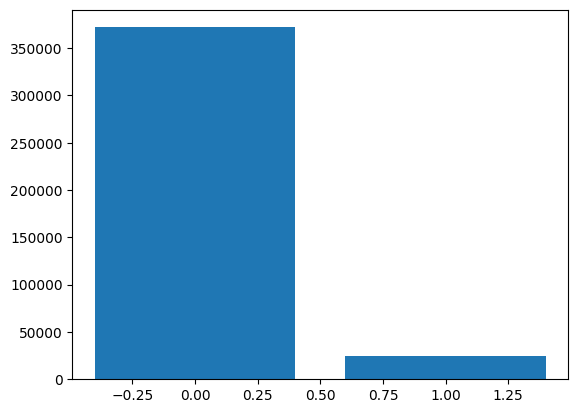

In [119]:
plt.bar([0, 1], data.target.value_counts())
plt.show()

## Modelling

In [120]:
from sklearn.preprocessing import OneHotEncoder

In [143]:
ohe = OneHotEncoder()

In [144]:
columnst_to_transform

['utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_adcontent',
 'utm_keyword',
 'device_category',
 'device_os',
 'device_brand',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'geo_city']

In [145]:
ohe.fit(data[columnst_to_transform])

OneHotEncoder()

In [146]:
ohe_names = ohe.get_feature_names_out()

In [147]:
ohe_names

array(['utm_source_BHcvLfOaCWvWTykYqHVe',
       'utm_source_BKeImrJuRDZcHiSSTdzm',
       'utm_source_CgsxHpdTmXHvrHqEKRxp', ..., 'geo_city_out',
       'geo_city_Тимофеевка', 'geo_city_Хомутово'], dtype=object)

In [148]:
len(ohe_names)

2174

In [149]:
ohe_data = ohe.transform(data[columnst_to_transform])

In [150]:
sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'conversion', 'target'],
      dtype='object')

In [151]:
columns_to_drop = ['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'conversion']

In [152]:
ndata = pd.DataFrame()

In [153]:
ndata[ohe_names] = ohe_data.toarray()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ndata[ohe_names] = ohe_data.toarray()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1836\1571807259.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [154]:
# sessions = sessions.drop(columns=columns_to_drop)

In [155]:
# %%time
# sessions.drop_duplicates(inplace=True)

In [156]:
ndata.shape

(396483, 2174)

In [157]:
data.shape

(396483, 13)

In [158]:
data['target'].value_counts()

target
0    372050
1     24433
Name: count, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [165]:
from sklearn.metrics import accuracy_score

In [198]:
from sklearn.metrics import confusion_matrix

In [160]:
rf_clf = RandomForestClassifier()

In [161]:
%%time
x_tr, x_test, y_tr, y_test = train_test_split(ndata[ohe_names], data['target'], random_state=RS)

CPU times: total: 1min 17s
Wall time: 2min 21s


In [162]:
%%time
rf_clf.fit(x_tr, y_tr)

CPU times: total: 15min 11s
Wall time: 15min 21s


RandomForestClassifier()

In [163]:
y_pred = rf_clf.predict(x_test)

In [209]:
roc_auc_score(y_test, y_pred)

0.4816214250163052

In [166]:
accuracy_score(y_test, y_pred)

0.9031486768696845

In [210]:
confusion_matrix(y_test, y_pred)

array([[89517,  3479],
       [ 6121,     4]], dtype=int64)

In [167]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [169]:
test_proba = rf_clf.predict_proba(x_test)

In [264]:
test_num = list( 1 if x > 0.011 else 0 for x in test_proba[:,1] )

In [265]:
roc_auc_score(y_test, test_num)

0.5885631420618486

In [266]:
confusion_matrix(y_test, test_num)

array([[34388, 58608],
       [ 1180,  4945]], dtype=int64)

In [267]:
accuracy_score(y_test, test_num)

0.3968180304879894

In [268]:
from sklearn.neural_network import MLPClassifier

In [269]:
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(2174, 512, 256), verbose=True)

In [270]:
%%time
mlp.fit(x_tr, y_tr)

Iteration 1, loss = 0.20816811
Iteration 2, loss = 0.19905285
Iteration 3, loss = 0.19337199


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


CPU times: total: 2h 22min 21s
Wall time: 32min 32s


MLPClassifier(hidden_layer_sizes=(2174, 512, 256), random_state=42,
              verbose=True)

In [271]:
y_pred_nn = mlp.predict(x_test)

In [272]:
y_pred_nn

array([0, 0, 0, ..., 0, 0, 0])

In [273]:
roc_auc_score(y_test, y_pred_nn)

0.49999462342466344

In [274]:
confusion_matrix(y_test, y_pred_nn)

array([[92995,     1],
       [ 6125,     0]], dtype=int64)